# Advanced SNR

Simulations of SNR efficiency, challenges to the fundamental assumptions of SNR (e.g. T2* decay during the readout)

In [ ]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal



## SNR and $T_2^*$ decay

The SNR equation alone implies that the readout time should be as long as possible, as this leads to more total measurement time, but practically this is limited by the $T_2^*$ decay rate, since at some point there will no longer be any signal to measure.  To incorporate the effect of this decay, we need to account for the signal modulations during the readout by integrating the signal area, accounting for $T_2^*$, which will offset signal gains from extending the readout

$$SNR \propto \frac{ \int_0^{T_{read}} \exp(-\tau / T_2^*) d\tau } { \sqrt{T_{read}} }$$

$T_{read}$ is the readout duration, the numerator the signal acquired during this readout time, and the demoninator captures how the total noise scales with the square root of measurement time.  

The above equation applieds for a one-sided decay, as in a gradient echo, while the following applies in the case of two-sided T2* decay, as in a spin echo:
$$SNR \propto \frac{\int_{-T_{read}/2}^{T_{read}/2} | \exp(-\tau / T_2^*)  | d\tau }{\sqrt{T_{read}}}$$

Maximum for one-sided decay: T_{read} / T_2^* =1.2806
Maximum for two-sided decay: T_{read} / T_2^* =2.4907


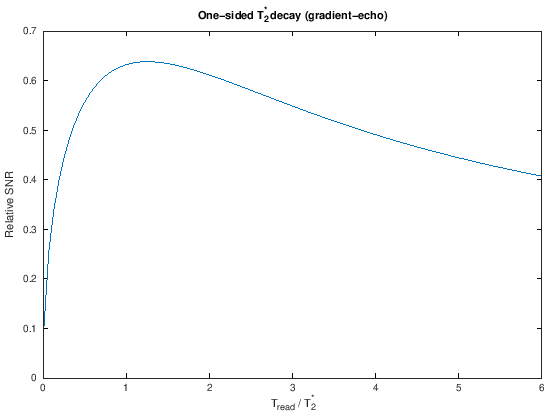

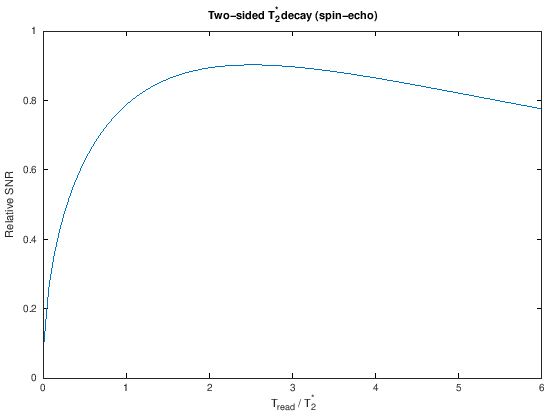

In [ ]:
Tread = linspace(0.01, 6);
T2s = 1;

SNR_T2s_onesided = T2s * (1 - exp(-Tread/T2s)) ./ sqrt(Tread);
[~, Imax_onesided] = max(SNR_T2s_onesided);

SNR_T2s_twosided = T2s * 2 * (1 - exp(-Tread/2 / T2s)) ./ sqrt(Tread);
[~, Imax_twosided] = max(SNR_T2s_twosided);

plot(Tread, SNR_T2s_onesided)
xlabel('T_{read} / T_2^*')
ylabel('Relative SNR')
title('One-sided T_2^* decay (gradient-echo)');

disp(['Maximum for one-sided decay: T_{read} / T_2^* =' num2str(Tread(Imax_onesided))])

figure
plot(Tread, SNR_T2s_twosided)
xlabel('T_{read} / T_2^*')
ylabel('Relative SNR')
title('Two-sided T_2^* decay (spin-echo)');

disp(['Maximum for two-sided decay: T_{read} / T_2^* =' num2str(Tread(Imax_twosided))])


From this result, we can see that the optimal choice of $T_{read}$ from a SNR point of view is approximately $ T_{read} / T_2^* = 1.3$ (one-sided) and $ T_{read} / T_2^* = 2.5$ (two-sided).

However, this relationship does not take into account the effects of resolution loss that will typically occur due to decaying $T_2^*$ weighting in k-space.  (See "MRI Signal Equation" for information on this effect).

## SNR efficiency versus TR

The SNR efficiency is useful to examine the choice of TR.  It is especially interesting for spoiled gradient-echo sequences where when we can choose to use the optimal flip angle ("Ernst angle") based on a $T_1$ value of interest.  For these sequences, the optimal flip angle is

$$\theta_{optimal} = \cos^{-1} \exp(-TR/T_1)$$

And $f_{seq,GRE}$ is defined above.

Under this condition, we see the following intriguing result.  Once the optimal flip angle begins to approach 90-degrees, the SNR efficiency begins to drop.  But for the shorter TRs, the SNR efficiency is relatively stable for different TRs.

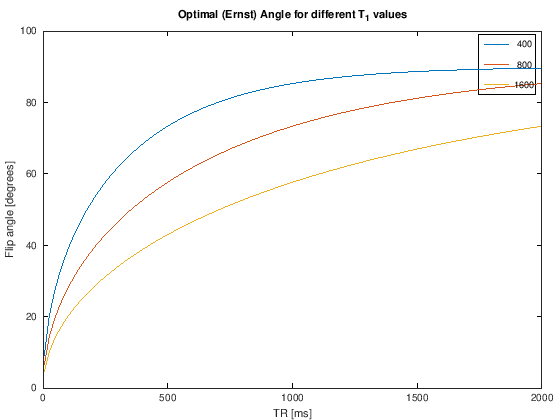

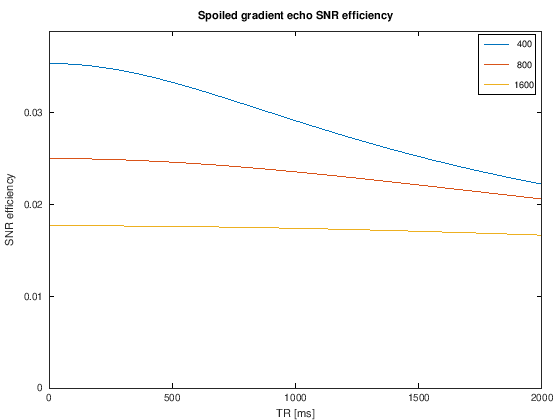

In [ ]:
% SNR efficiency for spoiled gradient echo pulse sequences

TRdT1 = linspace(.01,4);
T1 = [400 800 1600];

% To remove TE or T2 effect
TE = 0; T2 = Inf;
M0 = 1;

theta_optimal = zeros(length(T1), length(TR));
SNR_efficiency = zeros(length(T1), length(TR));

for IT1 = 1:length(T1)

theta_optimal(IT1,:) = acos(exp(-TR/T1(IT1)));


SNR_efficiency(IT1,:) = MRsignal_spoiled_gradient_echo(theta_optimal(IT1,:), TE, TR, M0, T1(IT1), T2) ./ sqrt(TR);
end
%subplot(121)
plot(TR, theta_optimal*180/pi)
xlabel('TR [ms]'), ylabel('Flip angle [degrees]')
title('Optimal (Ernst) Angle for different T_1 values')
legend(int2str(T1.'))
%subplot(122)
figure
plot(TR, SNR_efficiency)
ylim([0 1.1*max(SNR_efficiency(:))])
legend(int2str(T1.'))
xlabel('TR [ms]'), ylabel('SNR efficiency')
title('Spoiled gradient echo SNR efficiency for different T_1 values')